In [1]:
%cd /content/drive/MyDrive/Data Mining/6. Association Rule Learning

/content/drive/MyDrive/Data Mining/6. Association Rule Learning


In [2]:
#libraries
import pandas as pd
from mlxtend.frequent_patterns import association_rules, apriori

In [3]:
#Data

dataset = pd.read_csv('groceries.csv')
dataset.head()

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19,Item 20,Item 21,Item 22
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Preparing Transactions

dataset.shape

(9835, 22)

In [6]:
#Transaction List

transactions = []
for i in range(0, 9835):
  transactions.append([str(dataset.values[i,j]) for j in range(0, 22)])

In [30]:
#Encode the transactions

from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_transations = te.fit_transform(transactions)
df = pd.DataFrame(te_transations, columns=te.columns_)
df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [31]:
#Apriori

model = apriori(df, min_support=0.03, use_colnames=True)
results = association_rules(model, metric='confidence', min_threshold=0.3)
results.sort_values(by = 'lift', ascending=False)

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
46,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693,0.622764
65,"(root vegetables, nan)",(other vegetables),0.107778,0.193493,0.046467,0.431132,2.228158,0.025612,1.417741,0.617782
67,(root vegetables),"(nan, other vegetables)",0.108998,0.192069,0.046467,0.426306,2.219544,0.025531,1.408296,0.616674
52,(sausage),(rolls/buns),0.093950,0.183935,0.030605,0.325758,1.771048,0.013324,1.210344,0.480506
47,(tropical fruit),(other vegetables),0.104931,0.193493,0.035892,0.342054,1.767790,0.015589,1.225796,0.485239
...,...,...,...,...,...,...,...,...,...,...
90,"(root vegetables, whole milk)",(nan),0.048907,0.998170,0.047789,0.977131,0.978923,-0.001029,0.080030,-0.022137
94,"(whole milk, tropical fruit)",(nan),0.042298,0.998170,0.041281,0.975962,0.977751,-0.000939,0.076136,-0.023209
97,"(whipped/sour cream, whole milk)",(nan),0.032232,0.998170,0.031418,0.974763,0.976551,-0.000754,0.072522,-0.024211
76,"(other vegetables, yogurt)",(nan),0.043416,0.998170,0.042298,0.974239,0.976025,-0.001039,0.071045,-0.025036


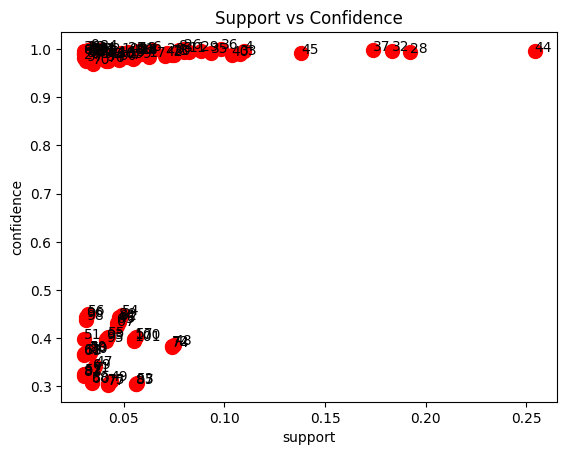

In [32]:
#Visualization

import matplotlib.pyplot as plt
plt.scatter(results['support'],
            results['confidence'],
            s = 100,
            color = 'red')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
for i, label in enumerate(results.index):
  plt.annotate(label,(results['support'][i], results['confidence'][i]))
plt.show()